In [1]:
import pandas as pd
import numpy as np


In [2]:
#Sentiment analyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [3]:
def analyze_sentiment(sentence):
    score = analyser.polarity_scores(sentence)
    return score



# Sentiment analysis on single text


In [4]:
analyze_sentiment("I Like to go out for cycling.")

{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}

In [20]:
data = pd.read_csv('health_data.csv')


In [21]:
#data preprocessing
data = data.dropna()

In [22]:
import string
import nltk
import re

In [23]:
data['Content'] = data['Content'].map(lambda x: re.sub(r'[^A-Za-z0-9]+',' ', x))

In [24]:

data.head()

,Content
0,This is just oil and water situation It just ...
1,First off Yes we have gone to the school about...
2,My cousin who s a lot older than me 30s tried ...
3,Hi First of all thank you for taking the time...
4,So it s not the first time but I m going throu...


In [25]:
data.shape

(87982, 1)

Unsupervised Sentiment On Reddit Data

In [26]:
data = data.head(5000)

In [27]:
data

,Content
0,This is just oil and water situation It just ...
1,First off Yes we have gone to the school about...
2,My cousin who s a lot older than me 30s tried ...
3,Hi First of all thank you for taking the time...
4,So it s not the first time but I m going throu...
...,...
4995,Hey guys I would like to ask you to check out ...
4996,Ever since I was very young I ve had a bad hab...
4997,A lot of the time when I m frustrated I catch ...
4998,27 male UK So after years of trying to cope on...


In [28]:
data['compound'] = [analyser.polarity_scores(x)['compound'] for x in data['Content']]
data['neg'] = [analyser.polarity_scores(x)['neg'] for x in data['Content']]
data['neu'] = [analyser.polarity_scores(x)['neu'] for x in data['Content']]
data['pos'] = [analyser.polarity_scores(x)['pos'] for x in data['Content']]

In [29]:
data

,Content,compound,neg,neu,pos
0,This is just oil and water situation It just ...,-0.9216,0.152,0.712,0.136
1,First off Yes we have gone to the school about...,0.9231,0.017,0.864,0.120
2,My cousin who s a lot older than me 30s tried ...,-0.9731,0.128,0.769,0.103
3,Hi First of all thank you for taking the time...,-0.8657,0.119,0.793,0.087
4,So it s not the first time but I m going throu...,-0.8519,0.140,0.795,0.065
...,...,...,...,...,...
4995,Hey guys I would like to ask you to check out ...,0.5719,0.078,0.779,0.143
4996,Ever since I was very young I ve had a bad hab...,-0.8965,0.136,0.791,0.073
4997,A lot of the time when I m frustrated I catch ...,-0.9538,0.206,0.707,0.087
4998,27 male UK So after years of trying to cope on...,-0.4142,0.100,0.796,0.104


In [30]:
#Data Visualization
import matplotlib.pyplot as plt

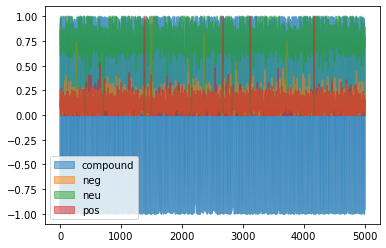

In [76]:
data.plot(y=["compound","neg","neu","pos"],kind="area",stacked =False)
plt.show()

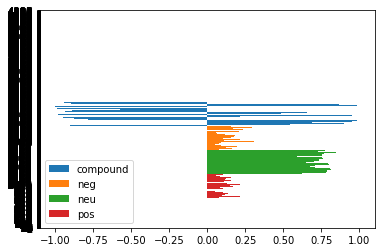

In [46]:
data.plot(y=["compound","neg","neu","pos"],kind="barh")
plt.show()

In [51]:
data.to_csv("sent_data.csv")

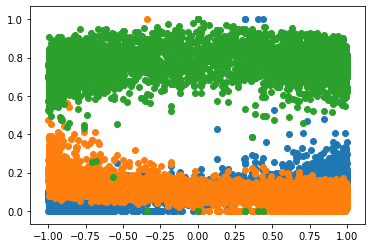

In [65]:

plt.scatter(x=data['compound'],y=data['pos'])
plt.scatter(x=data['compound'],y=data['neg'])
plt.scatter(x=data['compound'],y=data['neu'])

In [67]:
import seaborn as sns